This notebook executes a convolution betweeen the two horizon crossings

In [10]:
from astropy.table import Table
import numpy as np
from scipy import interpolate
from scipy.optimize import curve_fit
from astropy.io import ascii
import matplotlib.pyplot as plt
import datetime
import numbers

R = 6378
H = 419
G = 6.673e-11
M = 5.972e24
theta = np.arcsin(R/(R+H))


febEVT = Table.read('2200300102_pipe/cleanfilt.evt', hdu=1)
febEventTime = np.array(febEVT['TIME'])
janEVT = Table.read('2200300101_pipe/cleanfilt.evt', hdu=1)
janEventTime = np.array(janEVT['TIME'])

In [11]:
def countRate(timeArray):
    binCounts = []
    binTime = []
    timeList = []
    for i in np.arange(min(timeArray), max(timeArray)+1, 1):
        desind = np.where((timeArray >= i) & (timeArray < i + 1))
        if(len(desind[0]) != 0):
            binCounts.append(np.size(desind[0]))
            binTime.append(np.mean(timeArray[desind[0]]))
        else:
            binCounts.append(0)
            binTime.append(i)
    return np.array(binCounts), np.array(binTime)
    
febRate, febBinnedTime = countRate(febEventTime)
janRate, janBinnedTime = countRate(janEventTime)

In [12]:
firstPeriod = 5566.5 # based on 2 0rbits from feb 3
firstOrbitalRadius = (firstPeriod**2*G*M/(4*np.pi**2))**(1/3)
print(firstOrbitalRadius/1000)

6788.104789497814


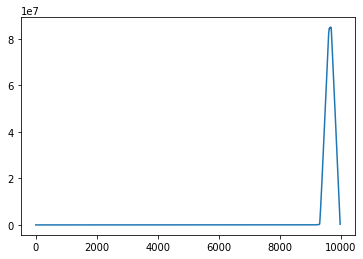

In [13]:
from numpy import convolve
%matplotlib inline
# each crossing is 4988 sec long
convolutionRate = convolve(janRate[1000:len(janBinnedTime)-1],febRate[12558:len(febBinnedTime)-1])
convolutionTime = febBinnedTime[12558:len(febBinnedTime)-1]-janBinnedTime[1000:len(janBinnedTime)-1]
plt.plot(convolutionRate)

In [14]:
maxIndex = np.where(convolutionRate==np.max(convolutionRate))[0][0]-4988
deltaT=febBinnedTime[12558+maxIndex]-janBinnedTime[1000+maxIndex] #also equals convolutionTime[maxIndex]
print(deltaT/firstPeriod)
betterPeriod = deltaT/47

47.08640485134106


In [15]:
betterPeriod #this is better!

5576.733459680639

In [16]:
tabMKF = Table.read('2200300101_pipe/ni2200300101.mkf', hdu=1)
timeMKF = np.array(tabMKF['TIME'])
elevMKF = np.array(tabMKF['ELV'])
ramMKF = np.array(tabMKF['RAM_ANGLE'])
pointing_unit = np.array(tabMKF['PNTUNIT'])
position = np.array(tabMKF['POSITION'])
position_mag = np.array(np.sqrt((position[:,0])**2+(position[:,1])**2+(tabMKF['POSITION'][:,2])**2))
np.mean(position_mag)

6797.674

In [17]:
RorbitCalc = (betterPeriod**2*G*M/(4*np.pi**2))**(1/3)
RorbitCalc/1000
# 9.6 km to 1.2 km error after this technique

6796.421748653554

In [22]:
omegaCalc=2*np.pi/betterPeriod
omegaCalc

0.0011266784314879921

In [23]:
2*np.pi/5577

0.001126624584396555